# 2D Brownian Motion
The same function can be used to generate Brownian motion in two dimensions, since each dimension is just a one-dimensional Brownian motion.

The following script provides a demo.

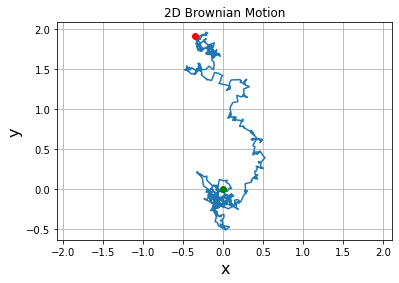

In [11]:
import numpy
from pylab import plot, show, grid, axis, xlabel, ylabel, title

# The Wiener process parameter.
delta = 0.25
# Total time.
T = 10.0
# Number of steps.
N = 500
# Time step size
dt = T/N
# Initial values of x.
x = numpy.empty((2,N+1))
x[:, 0] = 0.0

brownian(x[:,0], N, dt, delta, out=x[:,1:])

# Plot the 2D trajectory.
plot(x[0],x[1])

# Mark the start and end points.
plot(x[0,0],x[1,0], 'go')
plot(x[0,-1], x[1,-1], 'ro')

# More plot decorations.
title('2D Brownian Motion')
xlabel('x', fontsize=16)
ylabel('y', fontsize=16)
axis('equal')
grid(True)
show()

# 2D: Active Brownian Particle in Harmonic trap


## One ensamble

In [6]:
from math import sqrt
from scipy.stats import norm
import numpy as np


def brownian_ABP(initial_array, n, dt, delta):

    initial_array = np.asarray(initial_array)
    number_of_trajs = initial_array.shape
    number_of_timesteps = n
    std_of_pdf = delta #standard deviation of distribution
    mean = 0.0; #mean valve of distribution

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    random_num = norm.rvs(loc=mean, size=number_of_trajs + (number_of_timesteps,), scale=std_of_pdf)
    ## rvs(loc(mean value)=0, scale(standard deviation)=1, size=1, random_state=None)

    cumsum_noise = np.empty(random_num.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(random_num, axis=-1, out=cumsum_noise) ## sum over columns for each of the rows
    ## For axis=-1, if axis=-1 is the same as axis=1 in a two-dimensional array, it points to the first to the last

    # Add the initial condition.
    cumsum_noise += np.expand_dims(initial_array, axis=-1)
    ## simialr to reshape
    ## Insert a new axis that will appear at the axis position in the expanded array shape

    return cumsum_noise, random_num



    

In [7]:
from pylab import plot, show, grid, xlabel, ylabel
import numpy as np
from scipy import linalg
from scipy.sparse import diags

beta = 1.0;
Lambda = 1.0;

DiffusCoeff = 1.0

# Total time.
T = 10.0
# Number of steps.
N = 1000
# Time step size
dt = T/N
# Number of realizations to generate.
m = 3

# Create an empty array to store the realizations.
dynamic = np.empty((m,N+1)) # theta, x, y
rhs_x = np.empty(N)
rhs_y = np.empty(N)

# Initial values of theta, x, y.
x0 = 0.0;
y0 = 0.0;
theta0 = 0.0

dynamic[0, 0] = theta0
dynamic[1, 0] = x0
dynamic[2, 0] = y0

stochastic = brownian_ABP(dynamic[:,0], N, dt, 1)

dynamic[0,1:] = np.sqrt(2*DiffusCoeff*dt)*stochastic[0][0] #theta for each time step
dynamic[1,1:] = np.sqrt(2*DiffusCoeff*dt)*stochastic[1][1] #noise for x for each time step
dynamic[2,1:] = np.sqrt(2*DiffusCoeff*dt)*stochastic[1][2] #noise for y for each time step


a_x = diags([np.ones(N), -(1-beta*dt), np.zeros(N)], [0, -1, 1]).toarray()
a_y = diags([np.ones(N), -(1-beta*dt), np.zeros(N)], [0, -1, 1]).toarray()

rhs_x = dynamic[1,1:] + Lambda*np.cos(dynamic[0,:N])*dt
rhs_x[0] = rhs_x[0] + (1-beta*dt)*x0

rhs_y = dynamic[2,1:] + Lambda*np.sin(dynamic[0,:N])*dt
rhs_y[0] = rhs_y[0] + (1-beta*dt)*x0



x = linalg.solve(a_x, rhs_x)
y = linalg.solve(a_y, rhs_y)

x = np.insert(x, 0, x0)
y = np.insert(y, 0, y0)


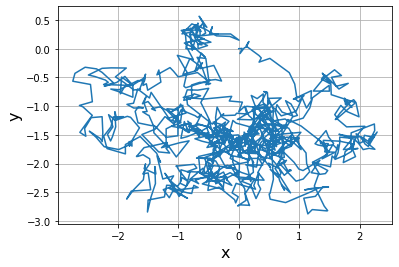

In [8]:

t = np.linspace(0.0, N*dt, N+1)
plot(x, y)
xlabel('x', fontsize=16)
ylabel('y', fontsize=16)
grid(True)
show()


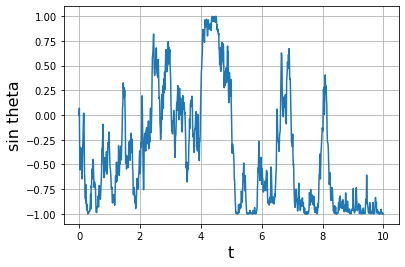

In [9]:

t = np.linspace(0.0, N*dt, N+1)
plot(t, np.sin(dynamic[0,:]))
xlabel('t', fontsize=16)
ylabel('sin theta', fontsize=16)
grid(True)
show()


# 2D: Active Brownian Particle in Harmonic trap


## Many ensamble 

In [12]:
from math import sqrt
from scipy.stats import norm
import numpy as np


def brownian_ABP_ensamble(initial_array, n, dt, delta):

    initial_array = np.asarray(initial_array)
    number_of_trajs = initial_array.shape
    number_of_timesteps = n
    std_of_pdf =  1.0#standard deviation of distribution
    mean = 0.0; #mean valve of distribution

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    random_num = norm.rvs(loc=mean, size=number_of_trajs + (number_of_timesteps,), scale=std_of_pdf)
    ## rvs(loc(mean value)=0, scale(standard deviation)=1, size=1, random_state=None)

    cumsum_noise = np.empty(random_num.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    cumsum_noise = np.cumsum(random_num, axis=0) ## sum over columns for each of the rows
    ## For axis=-1, if axis=-1 is the same as axis=1 in a two-dimensional array, it points to the first to the last

    # Add the initial condition.
    cumsum_noise += np.expand_dims(initial_array, axis=-1)
    ## simialr to reshape
    ## Insert a new axis that will appear at the axis position in the expanded array shape

    return cumsum_noise, random_num



    

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import linalg
from scipy.sparse import diags

beta = 8.0;
Lambda = 0.0;

DiffusCoeff = 1.0

# Total time.
T = 1.0
# Number of steps.
N = 1000
# Time step size
dt = T/N
# Number of realizations to generate.
Nensamble = 10000;
m = 3

# Create an empty array to store the realizations.
dynamic = np.empty((Nensamble*m,N+1)) # theta, x, y
rhs_x = np.empty((N,Nensamble))
rhs_y = np.empty((N,Nensamble))

# Initial values of theta, x, y.
x0 = 0.0;
y0 = 0.0;
theta0 = 0.0

dynamic[0:Nensamble,0] = theta0
dynamic[Nensamble:2*Nensamble,0] = x0
dynamic[2*Nensamble:3*Nensamble,0] = y0

browni = brownian_ABP_ensamble(dynamic[:,0], N, dt, 1.0)

dynamic[0:Nensamble,1:] = browni[0][0:Nensamble] #theta for each time step
theta = dynamic[0:Nensamble,1:].transpose()
dynamic[Nensamble:2*Nensamble,1:] = browni[1][Nensamble:2*Nensamble] #noise for x for each time step
dynamic[2*Nensamble:3*Nensamble,1:] = browni[1][2*Nensamble:3*Nensamble] #noise for y for each time step


a_x = diags([np.ones(N), -(1-beta*dt), np.zeros(N)], [0, -1, 1]).toarray()
a_y = diags([np.ones(N), -(1-beta*dt), np.zeros(N)], [0, -1, 1]).toarray()

rhs_x = (dynamic[Nensamble:2*Nensamble,1:] + Lambda*np.cos(dynamic[0:Nensamble,:N])*dt).transpose()
rhs_x[0,:] = rhs_x[0,:] + (1-beta*dt)*x0

rhs_y = (dynamic[2*Nensamble:3*Nensamble,1:] + Lambda*np.sin(dynamic[0:Nensamble,:N])*dt).transpose()
rhs_y[0,:] = rhs_y[0,:] + (1-beta*dt)*x0

x = linalg.solve(a_x, rhs_x)
y = linalg.solve(a_y, rhs_y)

x = np.insert(x,0,[x0*np.ones(Nensamble)],axis= 0)
y = np.insert(y,0,[y0*np.ones(Nensamble)],axis= 0)




In [14]:
theta.shape

(1000, 10000)

In [18]:
type(y)

numpy.ndarray

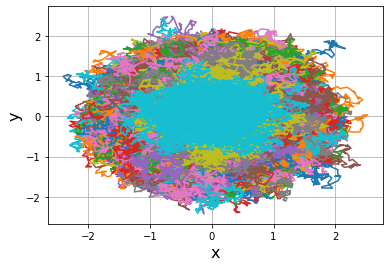

In [3]:
# t = np.linspace(0.0, N*dt, N+1)
# plt.plot(x, y)
# plt.xlabel('x', fontsize=16)
# plt.ylabel('y', fontsize=16)
# plt.grid(True)
# plt.show()

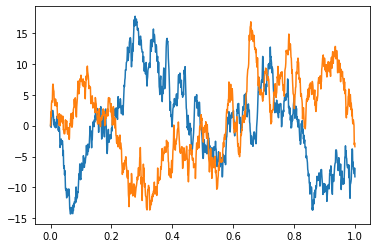

In [15]:
t = np.linspace(0.0, N*dt, N+1)
plt.plot(t, x[:,3])
plt.plot(t, y[:,3])

In [39]:
x.shape

(1001, 10000)

(-32.84620028179345, 31.840123719721657, -35.80278468098238, 36.59915163514021)

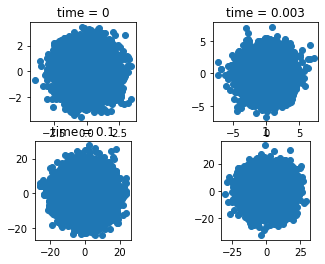

In [16]:
fig, axs = plt.subplots(2, 2)
plt.axis('scaled')

axs[0, 0].scatter(x[1,:],y[1,:])
axs[0, 0].set_title('time = 0')
axs[0, 0].axis('scaled')
axs[0, 1].scatter(x[3,:],y[3,:])
axs[0, 1].set_title('time = 0.003')
axs[0, 1].axis('scaled')
axs[1, 0].scatter(x[100,:],y[100,:])
axs[1, 0].set_title('time = 0.1')
axs[1, 0].axis('scaled')
axs[1, 1].scatter(x[1000,:],y[1000,:])
axs[1, 1].set_title('1')
axs[1, 1].axis('scaled')



# plt.scatter(x[1,:],y[1,:])


### histograms

In [17]:
theta.shape

(1000, 10000)

<BarContainer object of 20 artists>

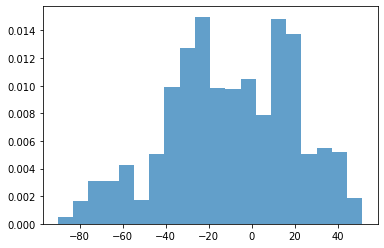

In [18]:
plt.hist(theta[0,:], bins=20, alpha=0.7, density=True)[2]

<BarContainer object of 20 artists>

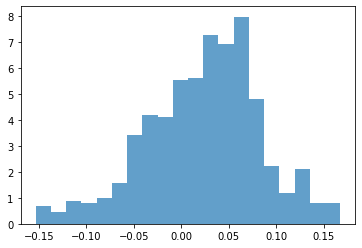

In [19]:
# y[100,:]
np.average(y,axis=1)
plt.hist(np.average(y,axis=1),alpha=0.7, density=True, bins=20)[2]

### histogram of r

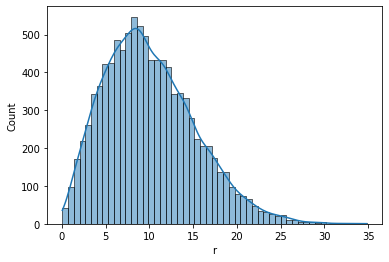

In [20]:
# r = np.sqrt(x**2 + y**2)
r = np.sqrt(x[N,:]**2 + y[N,:]**2)
# plt.hist(r, bins=20, alpha=0.7,  density=True)[2]



d = {"x": x[N,:], "y": y[N,:], "r": np.sqrt(np.power(x[N,:],2) + np.power(y[N,:],2))}
df_dynamics = pd.DataFrame(d)

import seaborn as sns
ax = sns.histplot(df_dynamics['r'], kde=True)

# plt.hist(np.mean(r, axis=1))

(array([ 15.,  30.,  63.,  85.,  85., 103., 126.,  95.,  65.,  62.,  46.,
         46.,  30.,  38.,  35.,  37.,  20.,   6.,   8.,   6.]),
 array([0.        , 0.010258  , 0.020516  , 0.030774  , 0.041032  ,
        0.05129   , 0.061548  , 0.071806  , 0.082064  , 0.092322  ,
        0.10258   , 0.112838  , 0.123096  , 0.133354  , 0.14361199,
        0.15386999, 0.16412799, 0.17438599, 0.18464399, 0.19490199,
        0.20515999]),
 <BarContainer object of 20 artists>)

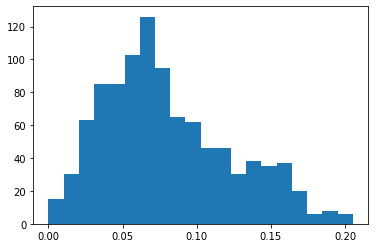

In [21]:
r = np.sqrt(np.average(x, axis=1)**2 + np.average(y, axis=1)**2)
# r = np.sqrt(x[N,:]**2 + y[N,:]**2)
plt.hist(r, bins=20)

# plt.hist(np.mean(r, axis=1))